In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [53]:
#index = range(0, 57)    # cosi la prima riga è l'indice delle colonne
spam_data = pd.read_csv('spam_tfidf.csv', index_col=[0])

spam_data.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,58
0,0.000000,1.846209,1.472720,0.0,0.719321,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.849699,0.000000,0.000,1
1,0.605787,0.688445,1.258362,0.0,0.324860,0.758411,0.622415,0.186400,0.000000,2.786049,...,0.000000,0.0,0.0,0.000000,0.351496,0.0,1.138615,0.533499,0.048,1
2,0.141709,0.000000,1.573143,0.0,3.764774,0.430333,0.457440,0.302007,2.038868,0.721175,...,0.191144,0.0,0.0,0.023618,0.337741,0.0,0.879262,0.530785,0.010,1
3,0.000000,0.000000,0.000000,0.0,1.627713,0.000000,0.800938,1.867246,0.812652,1.706424,...,0.000000,0.0,0.0,0.000000,0.364811,0.0,0.501811,0.000000,0.000,1
4,0.000000,0.000000,0.000000,0.0,1.651520,0.000000,0.812652,1.928299,0.825484,1.738650,...,0.000000,0.0,0.0,0.000000,0.380397,0.0,0.389435,0.000000,0.000,1


In [62]:
X = spam_data.drop('58', axis=1)
y = spam_data['58']  # colonna che segna se è spam o meno
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [63]:
KNN = KNeighborsClassifier(n_neighbors=5)
start_time=time.time()
KNN.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
KNN.score(X_test, y_test)

Training time: 0.011652


0.8968512486427795

In [64]:
start_time=time.time()
y_predict = KNN.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_predict).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))

Prediction time: 0.093486
Missclassified examples: 95
Accuracy: 0.897


Text(33.22222222222222, 0.5, 'Truth')

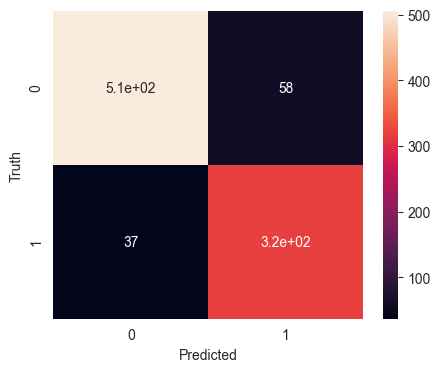

In [65]:
cm = confusion_matrix(y_test, y_predict)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')